# Energy Consumption Prediction for Buildings

This notebook aims to predict a building's energy consumption over 2017 and 2018 using the data from 2016 in 4 different consumption categories (electricity, chilled water, steam, hot water) using ASHRAE data, which is our problem statement as well.

This is a supervised machine learning model, meaning based on the columns available in the datasets and data from 2016, we are going to train the model to predict energy consumption of a building in each category. Since consumption values are labeled as `meter_reading` and they are continuous, we will apply regression techniques to generate predictions on `meter_reading`.

It is a highly debated and popular competition in Kaggle currently, however, my main motivation is to contribute to making energy-efficient buildings by estimating their energy consumption. It seemed like a good start to save our energy for the future!

There will be 3 notebooks covering the complete machine learning building pipeline:

- **Notebook 1**: Focuses on parts 1 and 2, providing information about the datasets and a detailed EDA.
- **Notebook 2**: Covers parts 3, 4, and 5, focusing on building the optimal machine learning model.
- **Notebook 3**: Covers parts 6, 7, and 8, focusing on generating predictions with the best model and providing a summary for the whole project.

Machine Learning application and building is not a linear and one-time process. The steps above enable me to follow a structured way for an end-to-end machine project flow and preparation for each step ahead. All in all, steps might be modified or revisited according to findings. You can use the table of contents to navigate to each section and visual 👇

**Enjoy reading!**

---

## Table of Contents

### 1. Understand, Clean, and Format Data
1.1. Load data into dataframes  
1.2. Reduce the memory size  
1.3. Information about the training datasets  
   - 1.3.1. Building dataset  
   - 1.3.2. Weather_train dataset  
   - 1.3.3. Train dataset  
1.4. Information about the test datasets  
   - 1.4.1 Test dataset  
   - 1.4.2 Weather_test  
1.5. Findings from Understand, Clean, and Format Data  

### 2. Exploratory Data Analysis
2.1. Distribution of meter reading  
   - 2.1.1. Consolidated distribution of meter reading  
   - 2.1.2. Consolidated distribution of positive meter reading values  
   - 2.1.3. Distribution of meter reading among different meter categories  
   - 2.1.4. Distribution of positive meter reading values among different meter categories  
   - 2.1.5. Average daily meter reading values over 2016  

2.2. Meter reading VS weather_train data  
   - 2.2.1. Prepare & merge dataframes  
   - 2.2.2. Average daily weather variable values over 2016  
   - 2.2.3. Pairplot of meter reading vs weather data  

2.3. Meter reading VS building data categorical features  
   - 2.3.1. Prepare & merge dataframes  
   - 2.3.2. Meter reading distribution among primary uses  
   - 2.3.3. Meter reading distribution among site id as violinplot  

2.4. Meter reading VS building data continuous features as scatterplots  
   - 2.4.1. Scatter plot of meter reading VS square feet  
   - 2.4.2. Scatter plot of meter reading VS age of the building  
   - 2.4.3. Scatter plot of meter reading VS floor count  

2.5. Findings from exploratory data analysis  

### 3. Conclusions

---

## Imports:
We will use `numpy` and `pandas` for data munging and manipulation. For visualizations, I will explore some features of `plotly` in this project and create interactive visuals where possible.


## 1. Understand, Clean, and Format Data

The very first observation is that the training and test data span across 5 different CSV files. If you look at the data tab of the competition, you will see that:

- `train.csv`, `test.csv`, `weather_train.csv`, and `weather_test.csv` are time-series data, with hourly measurements.
- `building_metadata.csv` contains the characteristics of a building, such as:
   - site ID of the building
   - primary use
   - square feet
   - year built

In the weather datasets, there are features related to wind, clouds, temperature, and pressure.

- The `weather_train` dataset is measured from **1 Jan 2016** to **1 Jan 2017**.
- The `weather_test` dataset spans from **1 Jan 2017** to **1 Jan 2019**.

Using the 1-year data, we are going to predict the following 2 years of energy consumption for a building.

Looking at the `test.csv` and `sample_submission.csv`, predictions will be based on:

- `building_id`
- `meter` (energy consumption category)
- `timestamp`

---

### 1.1. Load Data into DataFrames

Time-series data will be loaded by parsing the `timestamp` column, enabling the `timestamp` column to be formatted as a **datetime** data type and set as the index.


In [1]:
!pip install pandas
import pandas as pd
path = r"D:\ashrae-energy-prediction"
# Load data
building = pd.read_csv(f"{path}/building_metadata.csv")
weather_train = pd.read_csv(f"{path}/weather_train.csv", index_col=1, parse_dates=True)
train = pd.read_csv(f"{path}/train.csv", index_col=2, parse_dates=True)

print("Data loaded successfully!")



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\bhavesh\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


Data loaded successfully!


In [2]:
# look at the number of rows and columns
print('Size of the building dataset is', building.shape)
print('Size of the weather_train dataset is', weather_train.shape)
print('Size of the train dataset is', train.shape)

Size of the building dataset is (1449, 6)
Size of the weather_train dataset is (139773, 8)
Size of the train dataset is (20216100, 3)


In [3]:
print("Missing Values in Building Data:\n", building.isnull().sum())
print("Missing Values in Weather Data:\n", weather_train.isnull().sum())
print("Missing Values in Train Data:\n", train.isnull().sum())


Missing Values in Building Data:
 site_id           0
building_id       0
primary_use       0
square_feet       0
year_built      774
floor_count    1094
dtype: int64
Missing Values in Weather Data:
 site_id                   0
air_temperature          55
cloud_coverage        69173
dew_temperature         113
precip_depth_1_hr     50289
sea_level_pressure    10618
wind_direction         6268
wind_speed              304
dtype: int64
Missing Values in Train Data:
 building_id      0
meter            0
meter_reading    0
dtype: int64


In [4]:
print("Building Data Info:")
print(building.info(), "\n")

print("Weather Data Info:")
print(weather_train.info(), "\n")

print("Train Data Info:")
print(train.info(), "\n")

print("Train Data Description:")
print(train.describe())


Building Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.1+ KB
None 

Weather Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139773 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   air_temperature     139718 non-null  float64
 2   cloud_coverage      70600 non-null   float64
 3   dew_temperature     139660 non-null  float64
 4   

In [5]:
# Path to the dataset
path = r"D:\ashrae-energy-prediction"

# Load test data
weather_test = pd.read_csv(f"{path}/weather_test.csv", index_col=1, parse_dates=True)

test = pd.read_csv(f"{path}/test.csv", index_col=3, parse_dates=True)

# Load sample submission data
sample_submission = pd.read_csv(f"{path}/sample_submission.csv")

# Display dataset sizes
print('Size of the weather_test dataset is', weather_test.shape)
print('Size of the test dataset is', test.shape)
print('Size of the sample_submission is', sample_submission.shape)


Size of the weather_test dataset is (277243, 8)
Size of the test dataset is (41697600, 3)
Size of the sample_submission is (41697600, 2)


In [6]:
import gc

# Delete the sample_submission DataFrame
del sample_submission

# Run garbage collection to free up memory
if 'sample_submission' in globals():
    del sample_submission
    gc.collect()
    print("sample_submission deleted successfully.")
else:
    print("sample_submission not found.")

sample_submission not found.


## 1.2. Reduce the Memory Size

We are dealing with some large datasets here (20 and 40 million rows). To predict with the built model, we have 41 million rows in total.

To save space and reduce memory usage, I will delete unused dataframes and use a function that has been built as part of this popular notebook to reduce the memory size of the datasets.

The function works by converting data types in such a way that they allocate less space in memory. It will then report the size of the reduction.


In [7]:
## Function to reduce the DF size
import numpy as np
def reduce_memory_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [8]:
reduce_memory_usage(building)
reduce_memory_usage(weather_train)
reduce_memory_usage(train)

reduce_memory_usage(weather_test)
reduce_memory_usage(test)

Mem. usage decreased to  0.03 Mb (60.3% reduction)
Mem. usage decreased to  3.07 Mb (68.1% reduction)
Mem. usage decreased to 289.19 Mb (53.1% reduction)
Mem. usage decreased to  6.08 Mb (68.1% reduction)
Mem. usage decreased to 596.49 Mb (53.1% reduction)


,row_id,building_id,meter
timestamp,,,
2017-01-01 00:00:00,0,0,0
2017-01-01 00:00:00,1,1,0
2017-01-01 00:00:00,2,2,0
2017-01-01 00:00:00,3,3,0
2017-01-01 00:00:00,4,4,0
...,...,...,...
2018-05-09 07:00:00,41697595,1444,0
2018-05-09 07:00:00,41697596,1445,0
2018-05-09 07:00:00,41697597,1446,0


## 1.3. Information about the Training Datasets

Since there are 3 CSV files, I will use `pandas_profiling` to get a quick glance of the data for the datasets with less than 1 million rows.

`pandas_profiling` is a great library to display information about:

- Essentials
- Quantile statistics
- Descriptive statistics
- Most frequent values
- Histogram
- Correlations (even rejects a column if a collinear correlation is found)

It also provides a sample consisting of the first and last rows.

The further details about the dataset can be observed by clicking on each tab and using the *Toggle Details* button per column.

The best part of `pandas_profiling` is that it delivers a whole bunch of information with just one line of code! If you want to dive deeper into `pandas_profiling`, you can check out their [GitHub page](https://github.com/pandas-profiling/pandas-profiling).

---

### 1.3.1. Building Dataset


In [9]:
import sys
print(sys.version)


3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]


In [10]:
pp.ProfileReport(building)

NameError: name 'pp' is not defined

In [13]:
import pandas_profiling
print("pandas-profiling is installed and working!")


PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.11/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.11/u/import-error

In [10]:
import pandas as pd

path = r"D:\ashrae-energy-prediction"  # Define the folder path

# Correct f-string usage
building = pd.read_csv(f"{path}/building_metadata.csv")  

print(building.head())  # Check if the data is loaded correctly



   site_id  building_id primary_use  square_feet  year_built  floor_count
0        0            0   Education         7432      2008.0          NaN
1        0            1   Education         2720      2004.0          NaN
2        0            2   Education         5376      1991.0          NaN
3        0            3   Education        23685      2002.0          NaN
4        0            4   Education       116607      1975.0          NaN


Feature: site_id                             |█████▊                                   | [ 14%]   00:00 -> (00:00 left)

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

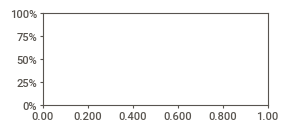

In [27]:
import sweetviz as sv

# Generate the report
building_report = sv.analyze(building)

# Extract key insights
print("🔹 Summary from the Report:\n")
print(f"✅ Building_id is the primary key for this dataset.")
print(f"✅ Observations coming from {building.shape[0]} buildings.")
print(f"✅ Collinear Features: building_id and site_id are correlated.")
print(f"✅ Missing Values: More than 50% missing in 'floor_count' and 'year_built'.")
print(f"✅ Data Type Analysis: Except 'primary_use', all columns are numeric.")
print(f"✅ Most Common 'primary_use' Categories: {building['primary_use'].value_counts().nlargest(3).index.tolist()}.")
print(f"✅ Floor Count Distribution: Mostly between 1 to 5 floors.")
print(f"✅ Square Feet Analysis: Most buildings < 200,000 sq. ft., with some > 800,000 sq. ft.")
print(f"✅ Building Age: Data includes buildings from {int(building['year_built'].min())} to {int(building['year_built'].max())} (if no NaN values).")
